In [1]:
import utils
import numpy as np
import tensorflow as tf
import evaluations

In [2]:
df5s, df10s, _ = utils.task4_df()
df = df5s

In [148]:
def build_lstm(x_train, y_train, x_test, y_test) -> tf.keras.Sequential:    
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10, activation='softmax'),
        ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), verbose=2)
    return model

In [149]:
models = []
for step in range(15):
    print(f"Training model {step + 1}")
    x_train, y_train, x_test, y_test = utils.preproccess_for_lstm(df5s)
    curr_model = build_lstm(x_train, y_train, x_test, y_test)
    models.append(curr_model)

Training model 1
Epoch 1/15
25/25 - 2s - 74ms/step - accuracy: 0.3443 - loss: 1.9453 - val_accuracy: 0.4907 - val_loss: 1.6076
Epoch 2/15
25/25 - 0s - 8ms/step - accuracy: 0.5097 - loss: 1.4508 - val_accuracy: 0.6052 - val_loss: 1.2708
Epoch 3/15
25/25 - 0s - 8ms/step - accuracy: 0.6071 - loss: 1.1865 - val_accuracy: 0.6456 - val_loss: 1.0917
Epoch 4/15
25/25 - 0s - 8ms/step - accuracy: 0.6505 - loss: 1.0289 - val_accuracy: 0.6827 - val_loss: 0.9804
Epoch 5/15
25/25 - 0s - 8ms/step - accuracy: 0.7066 - loss: 0.8897 - val_accuracy: 0.6734 - val_loss: 0.9442
Epoch 6/15
25/25 - 0s - 8ms/step - accuracy: 0.7327 - loss: 0.7956 - val_accuracy: 0.7130 - val_loss: 0.8648
Epoch 7/15
25/25 - 0s - 8ms/step - accuracy: 0.7731 - loss: 0.7119 - val_accuracy: 0.7045 - val_loss: 0.8687
Epoch 8/15
25/25 - 0s - 7ms/step - accuracy: 0.7912 - loss: 0.6360 - val_accuracy: 0.7163 - val_loss: 0.8485
Epoch 9/15
25/25 - 0s - 7ms/step - accuracy: 0.8138 - loss: 0.5712 - val_accuracy: 0.7239 - val_loss: 0.8396
E

In [150]:
import pandas as pd

_, _, x_test, y_test = utils.preproccess_for_lstm(df5s)
y_test_grouped = np.array([l[0] for l in y_test])
true = pd.Series(y_test_grouped, name="true")

In [151]:
all_predictions = pd.DataFrame(
    [[np.argmax(track_pred_probas[-1]) for track_pred_probas in model.predict(x_test, verbose=0)] for model in models]
).transpose()
all_predictions["combined"] = pd.DataFrame(all_predictions.apply(lambda row: row.mode()[0], axis=1))
all_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,combined
0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,7,7,4,7,7,7,7,7,7,7,7,7,7,7,7,7
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,0,0,4,2,0,0,0,0,2,2,2,0,0,2,2,0
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
194,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
195,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
196,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [152]:
# all_predictions.apply(lambda col: np.mean(col == true), axis=0)["combined"]
scores: pd.Series = all_predictions.apply(lambda  col: np.mean(col==true))
scores["mean"] = scores.drop(columns="combined").mean()
scores.rename("accuracy").sort_values(ascending=False)

13          0.828283
combined    0.803030
11          0.787879
4           0.787879
14          0.787879
0           0.782828
3           0.782828
6           0.782828
mean        0.780619
9           0.777778
1           0.777778
12          0.772727
10          0.767677
5           0.767677
7           0.762626
2           0.762626
8           0.757576
Name: accuracy, dtype: float64

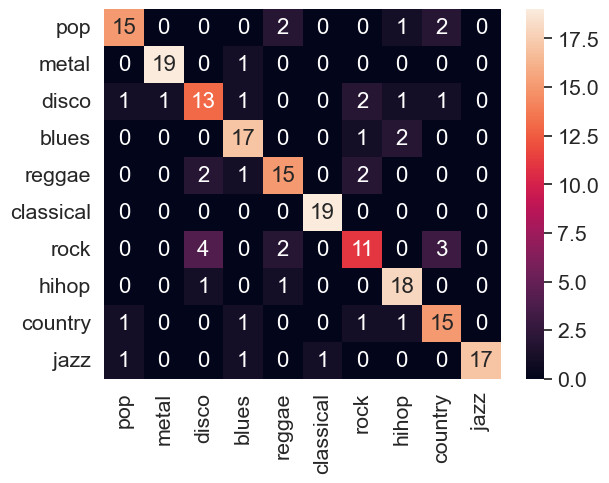

In [153]:
y_pred_grouped = all_predictions.combined.values
evaluations.conf_matrix(y_pred_grouped, y_test_grouped)

In [154]:
perf = evaluations.multiclass_performance_metrics(y_pred_grouped, y_test_grouped)
perf

,tp,tn,fp,fn,F1Score
pop,15,175,3,5,0.789474
metal,19,177,1,1,0.950000
disco,13,171,7,7,0.650000
blues,17,173,5,3,0.809524
reggae,15,173,5,5,0.750000
classical,19,178,1,0,0.974359
rock,11,172,6,9,0.594595
hihop,18,173,5,2,0.837209
country,15,173,6,4,0.750000
jazz,17,178,0,3,0.918919
